# GloVE

Let's work on implementation of GloVE.

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. Define nltk data of category 'news'

In [3]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
corpus = brown.sents(categories='news')

In [5]:
# Filter the `corpus` list to include only sentences (`sent`) that have a length greater than 2.
# This effectively removes short sentences or strings, such as empty strings or those with very few characters.
# The updated `corpus` list is then returned or stored

corpus = [sent for sent in corpus if len(sent) > 2]
corpus

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

In [6]:
#get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['20%',
 'Physicians',
 'banker',
 'hearts',
 'additional',
 'Theatre',
 'buried',
 'retaliating',
 'confront',
 '2nd',
 'surpluses',
 'Buckley',
 'Neusteter',
 'Africa',
 'dynamite',
 'Beneficiary',
 '1-3',
 'dread',
 'Banner',
 "students'",
 'globe',
 'charges',
 'form',
 'Pye',
 'faster',
 'cry',
 'tone',
 'twosome',
 'tougher',
 'comforting',
 'principal',
 'Benjamin',
 'Al',
 'U.',
 'Elizabeth',
 'Southeastern',
 'differently',
 'Harrity',
 'Sybert',
 'hours',
 'attacked',
 'booked',
 'tending',
 'ship',
 'Balenciaga',
 'Pathet',
 'averages',
 'twelfth',
 'winged',
 'Giving',
 '2269',
 'Elaine',
 'icy',
 'accompanying',
 "Authority's",
 'Mustang',
 'Homer',
 "o'clock",
 'Schultz',
 'Daley',
 'three-day',
 'hired',
 'flower',
 'defraud',
 'rings',
 'teach',
 'Edwards',
 'Benington',
 'contributed',
 'Dallas',
 'certain',
 'crazy',
 'Desert',
 'Knight',
 'investigation',
 'picketed',
 'logging',
 'cornering',
 'trend',
 'design-conscious',
 'Pesce',
 'glad',
 'Bubenik',
 'exempt',
 

In [7]:
#numericalization
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'20%': 0, 'Physicians': 1, 'banker': 2, 'hearts': 3, 'additional': 4, 'Theatre': 5, 'buried': 6, 'retaliating': 7, 'confront': 8, '2nd': 9, 'surpluses': 10, 'Buckley': 11, 'Neusteter': 12, 'Africa': 13, 'dynamite': 14, 'Beneficiary': 15, '1-3': 16, 'dread': 17, 'Banner': 18, "students'": 19, 'globe': 20, 'charges': 21, 'form': 22, 'Pye': 23, 'faster': 24, 'cry': 25, 'tone': 26, 'twosome': 27, 'tougher': 28, 'comforting': 29, 'principal': 30, 'Benjamin': 31, 'Al': 32, 'U.': 33, 'Elizabeth': 34, 'Southeastern': 35, 'differently': 36, 'Harrity': 37, 'Sybert': 38, 'hours': 39, 'attacked': 40, 'booked': 41, 'tending': 42, 'ship': 43, 'Balenciaga': 44, 'Pathet': 45, 'averages': 46, 'twelfth': 47, 'winged': 48, 'Giving': 49, '2269': 50, 'Elaine': 51, 'icy': 52, 'accompanying': 53, "Authority's": 54, 'Mustang': 55, 'Homer': 56, "o'clock": 57, 'Schultz': 58, 'Daley': 59, 'three-day': 60, 'hired': 61, 'flower': 62, 'defraud': 63, 'rings': 64, 'teach': 65, 'Edwards': 66, 'Benington': 67, 'contri

In [8]:
#vocab size
voc_size = len(vocab)
print(voc_size)

14326


In [9]:
#append UNK
vocab.append('<UNK>')

In [10]:
vocab

['20%',
 'Physicians',
 'banker',
 'hearts',
 'additional',
 'Theatre',
 'buried',
 'retaliating',
 'confront',
 '2nd',
 'surpluses',
 'Buckley',
 'Neusteter',
 'Africa',
 'dynamite',
 'Beneficiary',
 '1-3',
 'dread',
 'Banner',
 "students'",
 'globe',
 'charges',
 'form',
 'Pye',
 'faster',
 'cry',
 'tone',
 'twosome',
 'tougher',
 'comforting',
 'principal',
 'Benjamin',
 'Al',
 'U.',
 'Elizabeth',
 'Southeastern',
 'differently',
 'Harrity',
 'Sybert',
 'hours',
 'attacked',
 'booked',
 'tending',
 'ship',
 'Balenciaga',
 'Pathet',
 'averages',
 'twelfth',
 'winged',
 'Giving',
 '2269',
 'Elaine',
 'icy',
 'accompanying',
 "Authority's",
 'Mustang',
 'Homer',
 "o'clock",
 'Schultz',
 'Daley',
 'three-day',
 'hired',
 'flower',
 'defraud',
 'rings',
 'teach',
 'Edwards',
 'Benington',
 'contributed',
 'Dallas',
 'certain',
 'crazy',
 'Desert',
 'Knight',
 'investigation',
 'picketed',
 'logging',
 'cornering',
 'trend',
 'design-conscious',
 'Pesce',
 'glad',
 'Bubenik',
 'exempt',
 

In [11]:
word2index['<UNK>'] = 0

In [12]:
#just in case we need to use
index2word = {v:k for k, v in word2index.items()} 

## 2. Build Co-occurence Matrix X

Here, we need to count the co-occurence of two words given some window size.  We gonna use window size of 1.

In [13]:
from collections import Counter

X_i = Counter(flatten(corpus)) # X_i
X_i

Counter({'the': 5580,
         ',': 5188,
         '.': 4027,
         'of': 2849,
         'and': 2146,
         'to': 2116,
         'a': 1993,
         'in': 1893,
         'for': 943,
         'The': 803,
         'that': 802,
         '``': 732,
         'is': 732,
         'was': 717,
         "''": 700,
         'on': 657,
         'at': 598,
         'with': 545,
         'be': 526,
         'by': 497,
         'as': 481,
         'he': 451,
         'said': 402,
         'his': 399,
         'will': 389,
         'it': 363,
         'from': 344,
         'are': 328,
         ';': 314,
         'an': 300,
         'has': 300,
         '--': 300,
         'had': 279,
         'who': 268,
         'have': 265,
         'not': 254,
         'Mrs.': 253,
         'were': 252,
         'this': 250,
         'which': 244,
         'would': 244,
         'their': 219,
         'been': 212,
         'they': 205,
         'He': 191,
         'one': 184,
         'I': 179,
         'but'

In [14]:
# Make skip gram of one size window
skip_grams = []
# loop each word sequence
# we starts from 1 because 0 has no context
# we stop at second last for the same reason
for sent in corpus:
    for i in range(2, len(sent) - 1):
        target = sent[i]
        context = [sent[i - 1], sent[i + 1]]
        for w in context:
            skip_grams.append((target, w))

skip_grams

[('County', 'Fulton'),
 ('County', 'Grand'),
 ('Grand', 'County'),
 ('Grand', 'Jury'),
 ('Jury', 'Grand'),
 ('Jury', 'said'),
 ('said', 'Jury'),
 ('said', 'Friday'),
 ('Friday', 'said'),
 ('Friday', 'an'),
 ('an', 'Friday'),
 ('an', 'investigation'),
 ('investigation', 'an'),
 ('investigation', 'of'),
 ('of', 'investigation'),
 ('of', "Atlanta's"),
 ("Atlanta's", 'of'),
 ("Atlanta's", 'recent'),
 ('recent', "Atlanta's"),
 ('recent', 'primary'),
 ('primary', 'recent'),
 ('primary', 'election'),
 ('election', 'primary'),
 ('election', 'produced'),
 ('produced', 'election'),
 ('produced', '``'),
 ('``', 'produced'),
 ('``', 'no'),
 ('no', '``'),
 ('no', 'evidence'),
 ('evidence', 'no'),
 ('evidence', "''"),
 ("''", 'evidence'),
 ("''", 'that'),
 ('that', "''"),
 ('that', 'any'),
 ('any', 'that'),
 ('any', 'irregularities'),
 ('irregularities', 'any'),
 ('irregularities', 'took'),
 ('took', 'irregularities'),
 ('took', 'place'),
 ('place', 'took'),
 ('place', '.'),
 ('further', 'jury'),
 (

In [15]:
X_ik_skipgram = Counter(skip_grams) # Co-occurece in window size 1
X_ik_skipgram

Counter({('the', 'of'): 844,
         ('of', 'the'): 805,
         ('the', 'in'): 549,
         ('in', 'the'): 542,
         ('and', ','): 390,
         (',', 'and'): 389,
         ('the', ','): 364,
         (',', 'the'): 339,
         ("''", '.'): 293,
         ('the', 'to'): 273,
         ('to', 'the'): 268,
         ('the', 'on'): 239,
         ('on', 'the'): 236,
         ('the', 'for'): 217,
         ('for', 'the'): 214,
         ("''", ','): 198,
         (',', "''"): 198,
         ('the', 'at'): 179,
         ('at', 'the'): 177,
         ('be', 'will'): 157,
         (';', ';'): 157,
         ('the', 'that'): 146,
         ('that', 'the'): 145,
         ('and', 'the'): 136,
         ('the', 'and'): 136,
         ('will', 'be'): 136,
         ('the', 'with'): 135,
         ('with', 'the'): 131,
         ('who', ','): 126,
         (',', 'said'): 122,
         ('he', ','): 122,
         ('a', ','): 121,
         ('said', ','): 117,
         ('in', 'a'): 117,
         ('a', 'in'):

### Weighting function

GloVe includes a weighting function to scale down too frequent words.

<img src = "figures/glove_weighting_func.png" width=400>

In [16]:
#simply a normalized function...don't worry too much
def weighting(w_i, w_j, X_ik):
        
    #check whether the co-occurrences exist between these two words
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #if does not exist, set it to 1
                
    x_max = 100 #100 # fixed in paper  #cannot exceed 100 counts
    alpha = 0.75
    
    #if co-occurrence does not exceed 100, scale it based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max)**alpha  #scale it
    else:
        result = 1  #if is greater than max, set it to 1 maximum
    
    return result

The MemoryError occurs because you are generating all possible combinations of pairs in vocab using combinations_with_replacement. For large vocabularies, the number of pairs grows quadratically, making it infeasible to handle in memory. 

In [17]:
from itertools import combinations_with_replacement


X_ik = {}  # for keeping the co-occurrences
weighting_dic = {}  # scaling the percentage of sampling

for bigram in combinations_with_replacement(vocab, 2):
    if bigram in X_ik_skipgram:  # matches
        co_occur = X_ik_skipgram[bigram]  # get the count from what we already counted
        X_ik[bigram] = co_occur + 1  # +1 for stability issue
        X_ik[(bigram[1], bigram[0])] = co_occur + 1  # count also for the opposite

        weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
        weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

print(f"{X_ik=}")
print(f"{weighting_dic=}")


X_ik={('20%', "''"): 2, ("''", '20%'): 2, ('20%', 'by'): 2, ('by', '20%'): 2, ('20%', 'around'): 2, ('around', '20%'): 2, ('20%', 'in'): 2, ('in', '20%'): 2, ('Physicians', 'Oregon'): 2, ('Oregon', 'Physicians'): 2, ('Physicians', 'Service'): 2, ('Service', 'Physicians'): 2, ('banker', 'successful'): 2, ('successful', 'banker'): 2, ('banker', '.'): 2, ('.', 'banker'): 2, ('hearts', 'most'): 2, ('most', 'hearts'): 2, ('hearts', '.'): 2, ('.', 'hearts'): 2, ('additional', '2%'): 2, ('2%', 'additional'): 2, ('additional', 'with'): 2, ('with', 'additional'): 2, ('additional', 'and'): 2, ('and', 'additional'): 2, ('additional', 'an'): 6, ('an', 'additional'): 6, ('additional', 'services'): 2, ('services', 'additional'): 2, ('additional', 'liberals'): 2, ('liberals', 'additional'): 2, ('additional', 'provide'): 2, ('provide', 'additional'): 2, ('additional', '$457,000'): 2, ('$457,000', 'additional'): 2, ('additional', 'four'): 2, ('four', 'additional'): 2, ('additional', 'B-52'): 2, ('B-52'

In [18]:
X_ik

{('20%', "''"): 2,
 ("''", '20%'): 2,
 ('20%', 'by'): 2,
 ('by', '20%'): 2,
 ('20%', 'around'): 2,
 ('around', '20%'): 2,
 ('20%', 'in'): 2,
 ('in', '20%'): 2,
 ('Physicians', 'Oregon'): 2,
 ('Oregon', 'Physicians'): 2,
 ('Physicians', 'Service'): 2,
 ('Service', 'Physicians'): 2,
 ('banker', 'successful'): 2,
 ('successful', 'banker'): 2,
 ('banker', '.'): 2,
 ('.', 'banker'): 2,
 ('hearts', 'most'): 2,
 ('most', 'hearts'): 2,
 ('hearts', '.'): 2,
 ('.', 'hearts'): 2,
 ('additional', '2%'): 2,
 ('2%', 'additional'): 2,
 ('additional', 'with'): 2,
 ('with', 'additional'): 2,
 ('additional', 'and'): 2,
 ('and', 'additional'): 2,
 ('additional', 'an'): 6,
 ('an', 'additional'): 6,
 ('additional', 'services'): 2,
 ('services', 'additional'): 2,
 ('additional', 'liberals'): 2,
 ('liberals', 'additional'): 2,
 ('additional', 'provide'): 2,
 ('provide', 'additional'): 2,
 ('additional', '$457,000'): 2,
 ('$457,000', 'additional'): 2,
 ('additional', 'four'): 2,
 ('four', 'additional'): 2,
 (

In [19]:
weighting_dic

{('20%', "''"): 0.053182958969449884,
 ("''", '20%'): 0.053182958969449884,
 ('20%', 'by'): 0.053182958969449884,
 ('by', '20%'): 0.053182958969449884,
 ('20%', 'around'): 0.053182958969449884,
 ('around', '20%'): 0.053182958969449884,
 ('20%', 'in'): 0.053182958969449884,
 ('in', '20%'): 0.053182958969449884,
 ('Physicians', 'Oregon'): 0.053182958969449884,
 ('Oregon', 'Physicians'): 0.053182958969449884,
 ('Physicians', 'Service'): 0.053182958969449884,
 ('Service', 'Physicians'): 0.053182958969449884,
 ('banker', 'successful'): 0.053182958969449884,
 ('successful', 'banker'): 0.053182958969449884,
 ('banker', '.'): 0.053182958969449884,
 ('.', 'banker'): 0.053182958969449884,
 ('hearts', 'most'): 0.053182958969449884,
 ('most', 'hearts'): 0.053182958969449884,
 ('hearts', '.'): 0.053182958969449884,
 ('.', 'hearts'): 0.053182958969449884,
 ('additional', '2%'): 0.053182958969449884,
 ('2%', 'additional'): 0.053182958969449884,
 ('additional', 'with'): 0.053182958969449884,
 ('with',

## 3. Prepare train data

In [20]:
for c in corpus:
    print(c)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports

In [21]:
import numpy as np
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic, window_size=2):
    
    # Generate skip-grams dynamically based on the window size
    dynamic_skip_grams = []
    for sent in word_sequence:
        for i in range(window_size, len(sent) - window_size):
            target = sent[i]
            context = sent[i - window_size:i] + sent[i + 1:i + 1 + window_size]
            for ctx in context:
                dynamic_skip_grams.append((target, ctx))
    
    # Convert dynamic skip-grams to indices
    dynamic_skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in dynamic_skip_grams]
    
    random_inputs = []
    random_labels = []
    random_coocs = []
    random_weightings = []
    random_index = np.random.choice(range(len(dynamic_skip_grams_id)), batch_size, replace=False)  # Random sampling
    
    for i in random_index:
        random_inputs.append([dynamic_skip_grams_id[i][0]])  # Target word ID
        random_labels.append([dynamic_skip_grams_id[i][1]])  # Context word ID
        
        # Get co-occurrence
        pair = dynamic_skip_grams[i]
        cooc = X_ik.get(pair, 1)  # Default to 1 if not found
        random_coocs.append([math.log(cooc)])
        
        # Get weighting
        weighting = weighting_dic.get(pair, 1.0)  # Default to 1.0 if not found
        random_weightings.append([weighting])
                    
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weightings)


### Testing the method

In [22]:
#testing the method
batch_size = 128 # mini-batch size
window_size = 3
input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic, window_size )

print("Input: ", input_batch)
print("Target: ", target_batch)
print("Cooc: ", cooc_batch)
print("Weighting: ", weighting_batch)
print("Window size: ", window_size)

#we will convert them to tensor during training, so don't worry...

Input:  [[ 3835]
 [13496]
 [ 4435]
 [ 1200]
 [14073]
 [ 3748]
 [ 4840]
 [ 2809]
 [ 6860]
 [ 1906]
 [ 8037]
 [11156]
 [13812]
 [ 2458]
 [ 3748]
 [ 1926]
 [11070]
 [ 8037]
 [ 9726]
 [ 4387]
 [ 3748]
 [ 3748]
 [ 8037]
 [13089]
 [ 2715]
 [ 6016]
 [ 7943]
 [ 8150]
 [12211]
 [13959]
 [11088]
 [10749]
 [ 8716]
 [ 9281]
 [  726]
 [ 3748]
 [ 3892]
 [ 8037]
 [10435]
 [  932]
 [ 2475]
 [ 1398]
 [ 9185]
 [ 4870]
 [ 4822]
 [13710]
 [ 5876]
 [ 1905]
 [13934]
 [13632]
 [ 4905]
 [ 5287]
 [ 5579]
 [ 9575]
 [ 2146]
 [ 4727]
 [ 9185]
 [12205]
 [11088]
 [ 3748]
 [  916]
 [10479]
 [ 5047]
 [ 3590]
 [ 1941]
 [ 3681]
 [11088]
 [ 3045]
 [ 8037]
 [ 7943]
 [ 6449]
 [ 2146]
 [ 3284]
 [11088]
 [ 9357]
 [12736]
 [14274]
 [14009]
 [ 7333]
 [12565]
 [ 8876]
 [ 9030]
 [ 7850]
 [ 9507]
 [ 7850]
 [ 4344]
 [13144]
 [ 4327]
 [13823]
 [ 5201]
 [13101]
 [ 1862]
 [ 5261]
 [10016]
 [ 4600]
 [ 3748]
 [10861]
 [ 4044]
 [11088]
 [10151]
 [ 1409]
 [ 5840]
 [13346]
 [13101]
 [11088]
 [ 5569]
 [ 3525]
 [  662]
 [ 4344]
 [ 7740]
 [

## 4. Model

<img src ="figures/glove.png">

In [23]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

## 5. Training

In [24]:
batch_size     = 128 # mini-batch size
embedding_size = 2 #so we can later plot
model          = GloVe(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [26]:
import time

# Training
num_epochs = 500
batch_size = 128
window_sizes = [2,4,5,6,8,10]

for window_size in window_sizes:
    print(f"Training model with window size: {window_size}\n")
    
    for epoch in range(num_epochs):
        
        start = time.time()
        
        input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic, window_size)
        input_batch  = torch.LongTensor(input_batch)         #[batch_size, 1]
        target_batch = torch.LongTensor(target_batch)        #[batch_size, 1]
        cooc_batch   = torch.FloatTensor(cooc_batch)         #[batch_size, 1]
        weighting_batch = torch.FloatTensor(weighting_batch) #[batch_size, 1]
        
        optimizer.zero_grad()
        loss = model(input_batch, target_batch, cooc_batch, weighting_batch)
        
        loss.backward()
        optimizer.step()
        
        end = time.time()
        
        epoch_mins, epoch_secs = epoch_time(start, end)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")


Training model with window size: 2

Epoch: 100 | cost: 349.096527 | time: 0m 0s
Epoch: 200 | cost: 378.699158 | time: 0m 0s
Epoch: 300 | cost: 552.549194 | time: 0m 0s
Epoch: 400 | cost: 729.747131 | time: 0m 0s
Epoch: 500 | cost: 483.625458 | time: 0m 0s
Training model with window size: 4

Epoch: 100 | cost: 492.473969 | time: 0m 0s
Epoch: 200 | cost: 453.901459 | time: 0m 0s
Epoch: 300 | cost: 490.488464 | time: 0m 0s
Epoch: 400 | cost: 638.730286 | time: 0m 0s
Epoch: 500 | cost: 376.340271 | time: 0m 0s
Training model with window size: 5

Epoch: 100 | cost: 331.919983 | time: 0m 0s
Epoch: 200 | cost: 332.113403 | time: 0m 0s
Epoch: 300 | cost: 364.392059 | time: 0m 0s
Epoch: 400 | cost: 370.580811 | time: 0m 0s
Epoch: 500 | cost: 279.339050 | time: 0m 0s
Training model with window size: 6

Epoch: 100 | cost: 569.900085 | time: 0m 0s
Epoch: 200 | cost: 384.890472 | time: 0m 0s
Epoch: 300 | cost: 239.522400 | time: 0m 0s
Epoch: 400 | cost: 303.372101 | time: 0m 0s
Epoch: 500 | cost: 2

## 6. Plotting the embeddings

In [27]:
#list of vocabs
vocab[:10]

['20%',
 'Physicians',
 'banker',
 'hearts',
 'additional',
 'Theatre',
 'buried',
 'retaliating',
 'confront',
 '2nd']

In [28]:
word = vocab[0]

In [29]:
#numericalization
id = word2index[word]
id

0

In [30]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [31]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[0.3209, 0.9628]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7339,  2.0692]], grad_fn=<EmbeddingBackward0>))

In [32]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(1.5160, grad_fn=<SelectBackward0>)

In [33]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

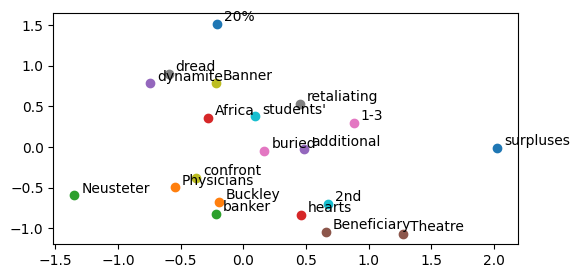

In [34]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [36]:
def get_full_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    return word_embed[0].detach().numpy()  # Return the full vector as a NumPy array

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_accuracy(questions, word_vectors, word2index):
    """
    Calculate accuracy for analogy questions using GloVe embeddings.
    
    Args:
        questions (list): List of analogy questions in format 'a b c d'.
        word_vectors (np.array): Pre-trained GloVe word vectors.
        word2index (dict): Mapping of words to their indices in `word_vectors`.
    
    Returns:
        float: Accuracy as a percentage.
    """
    correct = 0
    total = 0

    for question in questions:
        try:
            # Split the question into four words
            a, b, c, d = question.split()
            
            # Ensure all words are in the vocabulary
            if a in word2index and b in word2index and c in word2index and d in word2index:
                # Retrieve the embeddings
                vec_a = word_vectors[word2index[a]]
                vec_b = word_vectors[word2index[b]]
                vec_c = word_vectors[word2index[c]]

                # Compute the target vector for analogy: b - a + c
                target_vector = vec_b - vec_a + vec_c
                
                # Find the most similar word using cosine similarity
                similarities = cosine_similarity(target_vector.reshape(1, -1), word_vectors)
                predicted_index = np.argmax(similarities)

                # Retrieve the predicted word
                predicted_word = list(word2index.keys())[predicted_index]

                # Check if the predicted word matches the expected word
                if predicted_word == d:
                    correct += 1
                total += 1
        except Exception as e:
            continue  # Skip malformed questions or missing words

    # Calculate and return accuracy
    return (correct / total) * 100 if total > 0 else 0


In [38]:
# Load the dataset and split into semantic and syntactic subsets
def load_dataset(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    semantic_questions = []
    syntactic_questions = []
    current_section = None  # Initialize current_section

    for line in lines:
        if line.startswith(": capital-common-countries"):
            current_section = "semantic"
        elif line.startswith(": past-tense"):
            current_section = "syntactic"
        elif line.startswith(":"):
            current_section = None  # Reset for unrelated sections
        elif current_section == "semantic":
            semantic_questions.append(line.strip())
        elif current_section == "syntactic":
            syntactic_questions.append(line.strip())
    
    return semantic_questions, syntactic_questions

In [39]:
# Create word_vectors dictionary
word_vectors = {}

# Generate embeddings for all words in the vocabulary
for word in vocab:
    if word in word2index:  # Ensure the word is in the index
        word_vectors[word] = get_full_embed(word)  # Use get_full_embed for the full vector

print(f"Generated {len(word_vectors)} word vectors.")


Generated 14327 word vectors.


In [40]:
semantic_questions, syntactic_questions = load_dataset("word-test.v1.txt")

semantic_accuracy = calculate_accuracy(semantic_questions, word_vectors, word2index)
syntactic_accuracy = calculate_accuracy(syntactic_questions, word_vectors, word2index)

print(f"Semantic Accuracy: {semantic_accuracy:.2f}%")
print(f"Syntactic Accuracy: {syntactic_accuracy:.2f}%")

Semantic Accuracy: 0.00%
Syntactic Accuracy: 0.00%


## 7. Cosine similarity

Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

If $p$ and $q$ is super similar, the result is 1 otherwise 0.

In [41]:
vocab

['20%',
 'Physicians',
 'banker',
 'hearts',
 'additional',
 'Theatre',
 'buried',
 'retaliating',
 'confront',
 '2nd',
 'surpluses',
 'Buckley',
 'Neusteter',
 'Africa',
 'dynamite',
 'Beneficiary',
 '1-3',
 'dread',
 'Banner',
 "students'",
 'globe',
 'charges',
 'form',
 'Pye',
 'faster',
 'cry',
 'tone',
 'twosome',
 'tougher',
 'comforting',
 'principal',
 'Benjamin',
 'Al',
 'U.',
 'Elizabeth',
 'Southeastern',
 'differently',
 'Harrity',
 'Sybert',
 'hours',
 'attacked',
 'booked',
 'tending',
 'ship',
 'Balenciaga',
 'Pathet',
 'averages',
 'twelfth',
 'winged',
 'Giving',
 '2269',
 'Elaine',
 'icy',
 'accompanying',
 "Authority's",
 'Mustang',
 'Homer',
 "o'clock",
 'Schultz',
 'Daley',
 'three-day',
 'hired',
 'flower',
 'defraud',
 'rings',
 'teach',
 'Edwards',
 'Benington',
 'contributed',
 'Dallas',
 'certain',
 'crazy',
 'Desert',
 'Knight',
 'investigation',
 'picketed',
 'logging',
 'cornering',
 'trend',
 'design-conscious',
 'Pesce',
 'glad',
 'Bubenik',
 'exempt',
 

In [42]:
#let's try similarity between first and second, and second and third
cockpit          = get_embed('cockpit')
control        = get_embed('control')
members       = get_embed('members')

In [43]:
#numpy version
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
print(f"cockpit vs. control: ",        cos_sim(cockpit, control))
print(f"cockpit vs. members: ",       cos_sim(cockpit, members))
print(f"cockpit vs. cockpit: ",          cos_sim(cockpit, cockpit))

cockpit vs. control:  0.6472297413137235
cockpit vs. members:  0.97725895215257
cockpit vs. cockpit:  0.9999999999999998


In [44]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"cockpit vs. control: ",     cos_sim(cockpit, control))
print(f"cockpit vs. members: ",       cos_sim(cockpit, members))
print(f"cockpit vs. cockpit: ",          cos_sim(cockpit, cockpit))

cockpit vs. control:  0.6472297413137235
cockpit vs. members:  0.97725895215257
cockpit vs. cockpit:  1.0


In [45]:
def load_similarity_dataset(filepath):
    """
    Load the WordSim similarity dataset.
    Args:
        filepath (str): Path to the dataset file.
    Returns:
        list: List of tuples (word1, word2, human_score).
    """
    pairs = []
    with open(filepath, "r") as f:
        lines = f.readlines()
        for line in lines:
            word1, word2, score = line.strip().split()
            pairs.append((word1, word2, float(score)))
    return pairs




In [46]:
# Load `wordsim_similarity_goldstandard`
similarity_dataset = load_similarity_dataset("wordsim353/wordsim_similarity_goldstandard.txt")
print(f"Loaded {len(similarity_dataset)} word pairs from the dataset.")

Loaded 203 word pairs from the dataset.


In [47]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import numpy as np



# Function to compute model similarity using dot product
def compute_model_similarity(word_vectors, similarity_dataset):
    """
    Compute model similarity for word pairs using dot product.
    Args:
        word_vectors (dict): Dictionary mapping words to their embeddings.
        similarity_dataset (list): List of tuples (word1, word2, human_score).
    Returns:
        tuple: List of model scores and human similarity scores.
    """
    model_scores = []
    human_scores = []

    for word1, word2, human_score in similarity_dataset:
        if word1 in word_vectors and word2 in word_vectors:
            vec1 = word_vectors[word1]
            vec2 = word_vectors[word2]
            model_score = np.dot(vec1, vec2)  # Dot product as similarity
            model_scores.append(model_score)
            human_scores.append(human_score)
        else:
            print(f"Skipping pair ({word1}, {word2}): Out of vocabulary")

    return model_scores, human_scores


   


In [48]:

# Load word vectors (replace with your trained model's word_vectors)
# word_vectors should be a dictionary mapping words to their embeddings

# Compute model and human similarity scores
model_scores, human_scores = compute_model_similarity(word_vectors, similarity_dataset)

# Calculate Spearman correlation
correlation, p_value = spearmanr(model_scores, human_scores)
print(f"Spearman Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

#Calculate MSE
mse = mean_squared_error(human_scores, model_scores)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Skipping pair (tiger, cat): Out of vocabulary
Skipping pair (tiger, tiger): Out of vocabulary
Skipping pair (media, radio): Out of vocabulary
Skipping pair (cucumber, potato): Out of vocabulary
Skipping pair (smart, stupid): Out of vocabulary
Skipping pair (king, rook): Out of vocabulary
Skipping pair (bishop, rabbi): Out of vocabulary
Skipping pair (fuck, sex): Out of vocabulary
Skipping pair (football, soccer): Out of vocabulary
Skipping pair (Arafat, Jackson): Out of vocabulary
Skipping pair (vodka, gin): Out of vocabulary
Skipping pair (vodka, brandy): Out of vocabulary
Skipping pair (drink, eat): Out of vocabulary
Skipping pair (gem, jewel): Out of vocabulary
Skipping pair (journey, voyage): Out of vocabulary
Skipping pair (coast, shore): Out of vocabulary
Skipping pair (asylum, madhouse): Out of vocabulary
Skipping pair (magician, wizard): Out of vocabulary
Skipping pair (midday, noon): Out of vocabulary
Skipping pair (furnace, stove): Out of vocabulary
Skipping pair (food, fruit

In [51]:
# Example: Load `wordsim_similarity_goldstandard`
similarity_ds = load_similarity_dataset("wordsim353/wordsim_relatedness_goldstandard.txt")
print(f"Loaded {len(similarity_dataset)} word pairs from the dataset.")

Loaded 252 word pairs from the dataset.


In [52]:


# Load word vectors (replace with your trained model's word_vectors)
# word_vectors should be a dictionary mapping words to their embeddings

# Compute model and human similarity scores
model_scores, human_scores = compute_model_similarity(word_vectors, similarity_ds)

# Calculate Spearman correlation
correlation, p_value = spearmanr(model_scores, human_scores)
print(f"Spearman Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate MSE
mse = mean_squared_error(human_scores, model_scores)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Skipping pair (computer, keyboard): Out of vocabulary
Skipping pair (Jerusalem, Israel): Out of vocabulary
Skipping pair (planet, galaxy): Out of vocabulary
Skipping pair (canyon, landscape): Out of vocabulary
Skipping pair (OPEC, country): Out of vocabulary
Skipping pair (planet, people): Out of vocabulary
Skipping pair (environment, ecology): Out of vocabulary
Skipping pair (Maradona, football): Out of vocabulary
Skipping pair (OPEC, oil): Out of vocabulary
Skipping pair (computer, software): Out of vocabulary
Skipping pair (nature, environment): Out of vocabulary
Skipping pair (psychology, Freud): Out of vocabulary
Skipping pair (physics, proton): Out of vocabulary
Skipping pair (planet, constellation): Out of vocabulary
Skipping pair (hotel, reservation): Out of vocabulary
Skipping pair (closet, clothes): Out of vocabulary
Skipping pair (soap, opera): Out of vocabulary
Skipping pair (planet, astronomer): Out of vocabulary
Skipping pair (planet, space): Out of vocabulary
Skipping pa

In [53]:
print("Model Score vs Human Score\n")
print(model_scores)
print(human_scores)

Model Score vs Human Score

[-0.25000468, -0.085549995, 0.6836507, -0.63292396, 0.17127469, -1.4318904, -0.41361925, -0.41605031, 0.22572896, -0.33755118, -0.01617691, -0.63292396, 0.24654426, -1.1356721, 0.08838627, 0.21372136, 0.036270365, 0.44564548, 0.5130458, 0.75974584, -0.31364253, 0.17779586, 0.22104107, -0.13730955, 0.16426888, 0.15414262, -0.38755846, -0.92289084, -0.46965867, -0.47728348, 0.14898884, -0.5487022, 0.46792698, 0.08421898, 0.20684089, -0.30416375, 0.18709779, -0.14528686, -0.39639217, 0.32036752, -0.22264156, 0.2729916, 0.30352336, -0.56860125, 0.020173654, 0.57984746, -0.30973175, -0.042472847, -0.5941827, -0.034697782, -0.07987296, 0.03859035, -0.57015216, 0.006505735, -0.5779033, -0.18550363, -0.09217796, -0.014961923, -0.04166329, 0.0071388707, 0.22598693, 0.18247744, 0.36071372, -0.12595516, 0.07004802, 0.17349426, 0.45367628, -0.32620797, -0.106619865, 0.3819304, -1.2831378, -0.29300466, -0.10666336, -0.79852986, -1.1536846, 0.5716045, 1.9232515, 0.6014876